### Переобучение и недообучение решающего дерева

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import numpy as np

Решаем задачу предсказания уровня трат покупателя по его входным данным:
- id покупателя
- пол покупателя
- возраст покупателя
- годовой доход покупателя

[Данные можно найти тут](https://www.kaggle.com/datasets/shwetabh123/mall-customers?resource=download)

In [4]:
# загружаем данные
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# посмотрим тип данных и нет ли пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

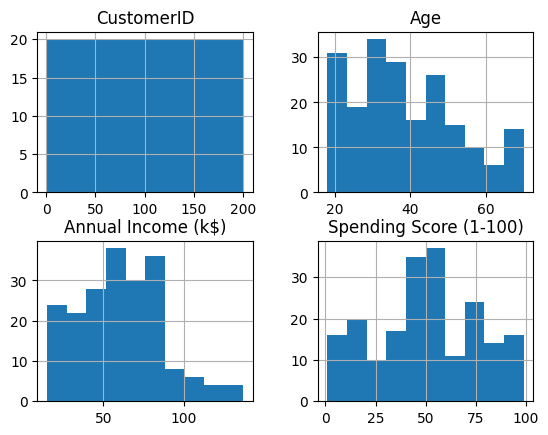

In [6]:
df.hist()

- Целевая переменная - РЭЙТИНГ ТРАТ `Spending Score`

- переопределяем пол на 1 и 0 

In [7]:
# отделяем признаки (features)

features = df[['Genre', 'Age', 'Annual Income (k$)']].copy()
features['Genre'] = (features['Genre'] == 'Male') * 1  # результатом будет True и False * 1 для получения значания 0 и 1 в столбце 
features.head()

,Genre,Age,Annual Income (k$)
0,1,19,15
1,1,21,15
2,0,20,16
3,0,23,16
4,0,31,17


In [8]:
# отделяем целевую переменную (target)
target = df['Spending Score (1-100)']

In [9]:
# features_train - данные для тренировки модели (признаки объектов)
# features_test - данные для проверки модели (признаки объектов)

# target_test  - целевые признаки тестовая часть датасэта
# target_train - целевые признаки тренировочная часть датасэта


features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=42)

Обучим очень сложное дерево - задав параметр `min_samples_leaf = 1`

Параметр  `min_samples_leaf`  в машинном обучении относится к алгоритмам деревьев решений. Он определяет минимальное количество образцов (наблюдений) в листе дерева, которое требуется для того, чтобы продолжить деление. Если в листе находится меньше образцов, чем указано в  `min_samples_leaf` , то деление прекращается, и лист считается листом-терминалом. Этот параметр помогает контролировать переобучение модели и обеспечивает более устойчивые и интерпретируемые результаты. Значение  `min_samples_leaf = 1`  означает, что в листе должен быть хотя бы один образец, чтобы продолжить деление дерева.

In [10]:
model = DecisionTreeRegressor(min_samples_leaf=1, random_state=1)

model.fit(features_train, target_train)    # обучаем на обучающих данных
pred_train = model.predict(features_train) # прогнозируем значения на обучающей части
pred_test = model.predict(features_test)   # прогнозируем значения на валидационной части

print(f'Качество на обучающей выборке: {mean_absolute_error(pred_train, target_train)}') # оцениваем качество по MAE, тк это задача регрессии
print(f'Качество на валидационной выборке: {mean_absolute_error(pred_test, target_test)}')

Качество на обучающей выборке: 0.6266666666666667
Качество на валидационной выборке: 19.0


In [11]:
model.get_depth()

17

Понаблюдаем как меняются ошибки в зависимости от сложности алгоритма

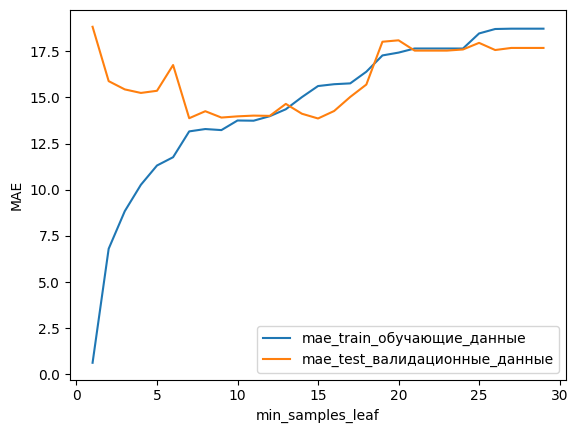

In [12]:
# 2.3.5 Переобучение и недообучение на примере решающего дерева - тайминг 5.16
res = []
for param in range(1, 30, 1):
    model = DecisionTreeRegressor(min_samples_leaf=param, random_state=42)

    model.fit(features_train, target_train)
    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)

    res.append([param, mean_absolute_error(pred_train, target_train), mean_absolute_error(pred_test, target_test)])
    
res_pd = pd.DataFrame(res, columns=['min_samples_leaf', 'mae_train', 'mae_test'])

res_pd.set_index('min_samples_leaf')['mae_train'].plot(label='mae_train_обучающие_данные')
res_pd.set_index('min_samples_leaf')['mae_test'].plot(label='mae_test_валидационные_данные')
plt.legend()
plt.ylabel('MAE');

- построение столбца по маске 

In [13]:
res_pd[res_pd['mae_test'] == res_pd['mae_test'].min()]

,min_samples_leaf,mae_train,mae_test
14,15,15.61128,13.854993


In [14]:
res_pd

,min_samples_leaf,mae_train,mae_test
0,1,0.626667,18.820000
1,2,6.801111,15.876667
2,3,8.836444,15.429667
3,4,10.264857,15.238048
4,5,11.308444,15.354286
5,6,11.757611,16.748502
6,7,13.155815,13.869351
7,8,13.283074,14.248400
8,9,13.225889,13.904733
9,10,13.745861,13.970051


### Случайный лес

In [15]:
from sklearn.ensemble import RandomForestRegressor

Решаем задачу оценки качества вина по 10-бальной шкале в зависимости от результатов замеров некоторых показателей (остаточный сахар, кислотность, крепость и др)  
[Данные можно найти тут](https://archive.ics.uci.edu/dataset/186/wine+quality)

In [16]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
features = df.drop(['quality'], axis=1)
target = df['quality']

In [19]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=42)

Выберем лучшее дерево

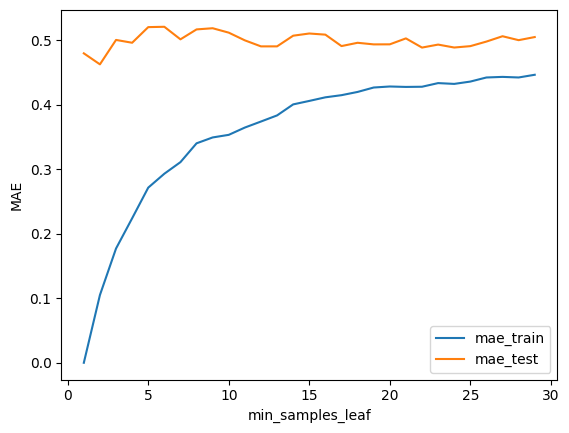

In [20]:
res = []
for param in range(1, 30, 1):
    model = DecisionTreeRegressor(min_samples_leaf=param, random_state=7)

    model.fit(features_train, target_train)
    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)

    res.append([param, mean_absolute_error(pred_train, target_train), mean_absolute_error(pred_test, target_test)])
    
res_pd = pd.DataFrame(res, columns=['min_samples_leaf', 'mae_train', 'mae_test'])

res_pd.set_index('min_samples_leaf')['mae_train'].plot(label='mae_train')
res_pd.set_index('min_samples_leaf')['mae_test'].plot(label='mae_test')
plt.legend()
plt.ylabel('MAE');

In [21]:
res_pd[res_pd['mae_test'] == res_pd['mae_test'].min()]

,min_samples_leaf,mae_train,mae_test
1,2,0.105088,0.462917


Увеличим число деревьев

In [22]:
model = RandomForestRegressor(n_estimators=5, min_samples_leaf=2, random_state=7)

model.fit(features_train, target_train)
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(f'Ошибка на обучающей выборке: {mean_absolute_error(pred_train, target_train)}')
print(f'Ошибка на валидационной выборке: {mean_absolute_error(pred_test, target_test)}')

Ошибка на обучающей выборке: 0.23516025259144524
Ошибка на валидационной выборке: 0.4569750000000001


Попробуем обучить много деревьев

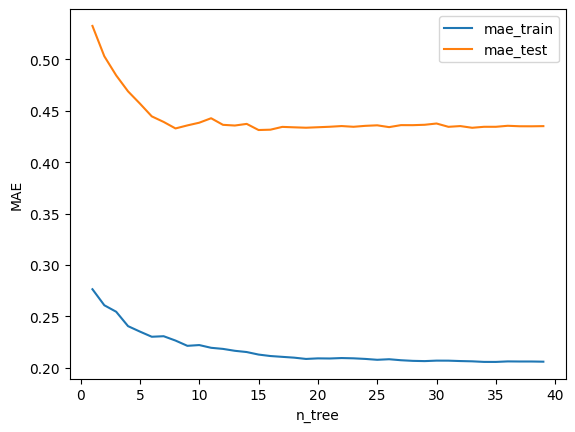

In [23]:
res = []
for n_tree in range(1, 40):
    model = RandomForestRegressor(n_estimators=n_tree, min_samples_leaf=2, random_state=7)

    model.fit(features_train, target_train)
    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)

    res.append([n_tree, mean_absolute_error(pred_train, target_train), mean_absolute_error(pred_test, target_test)])

res_pd = pd.DataFrame(res, columns=['n_tree', 'mae_train', 'mae_test'])

res_pd.set_index('n_tree')['mae_train'].plot(label='mae_train')
res_pd.set_index('n_tree')['mae_test'].plot(label='mae_test')
plt.legend()
plt.ylabel('MAE');

In [24]:
res_pd[res_pd['mae_test'] == res_pd['mae_test'].min()]

,n_tree,mae_train,mae_test
14,15,0.212802,0.431253


### Градиентный бустинг

In [25]:
from xgboost import XGBRegressor

In [26]:
features_train_xgb, features_val, target_train_xgb, target_val = train_test_split(features_train, target_train, test_size=0.15, random_state=42)

Что будет, если захотеть сэкономить на времени обучения и пойти к решению очень большими шагами.

[0]	validation_0-rmse:2.07801	validation_1-rmse:2.23228
[1]	validation_0-rmse:7.83099	validation_1-rmse:7.76857
[2]	validation_0-rmse:30.84671	validation_1-rmse:31.19565
[3]	validation_0-rmse:121.88996	validation_1-rmse:122.64499
[4]	validation_0-rmse:481.81424	validation_1-rmse:485.41386
[5]	validation_0-rmse:1904.86310	validation_1-rmse:1918.46525
[6]	validation_0-rmse:7532.04890	validation_1-rmse:7586.38716
[7]	validation_0-rmse:29786.89501	validation_1-rmse:30000.84972
[8]	validation_0-rmse:117814.29207	validation_1-rmse:118659.60802
[9]	validation_0-rmse:466046.52822	validation_1-rmse:469382.63419
Ошибка MAE на обучающей выборке: 416644.27155442035
Ошибка MAE на валидационной выборке: 407090.071796875


c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

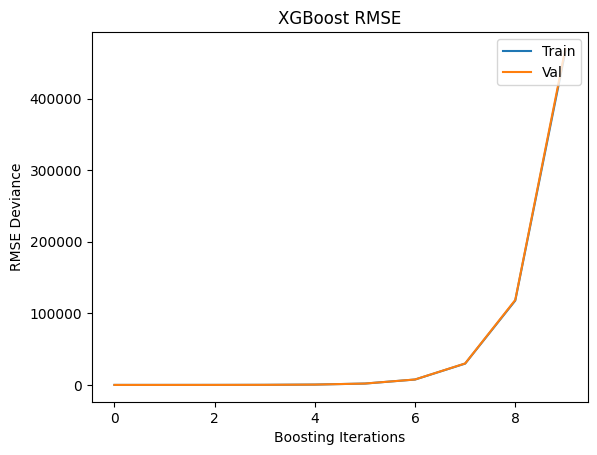

In [27]:
# 2.3.7 Регуляризация градиентного бустинга тайминг 2.50 
model = XGBRegressor(n_estimators=10, max_depth=3, learning_rate=5)

model.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb, target_train_xgb), (features_val, target_val)])
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(f'Ошибка MAE на обучающей выборке: {mean_absolute_error(pred_train, target_train)}')
print(f'Ошибка MAE на валидационной выборке: {mean_absolute_error(pred_test, target_test)}')

epochs = len(model.evals_result()['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model.evals_result()['validation_0']['rmse'], label='Train')
ax.plot(x_axis, model.evals_result()['validation_1']['rmse'], label='Val')

plt.title('XGBoost RMSE')
plt.xlabel("Boosting Iterations")
plt.ylabel("RMSE Deviance")
plt.legend(loc="upper right");

Что будет, если обучать сложные модели на каждом шаге.

[0]	validation_0-rmse:0.38160	validation_1-rmse:0.75236


c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

[1]	validation_0-rmse:0.23768	validation_1-rmse:0.75684
[2]	validation_0-rmse:0.13823	validation_1-rmse:0.76254
[3]	validation_0-rmse:0.09229	validation_1-rmse:0.77160
[4]	validation_0-rmse:0.06918	validation_1-rmse:0.77286
[5]	validation_0-rmse:0.04962	validation_1-rmse:0.77211


[6]	validation_0-rmse:0.04154	validation_1-rmse:0.77093
[7]	validation_0-rmse:0.03668	validation_1-rmse:0.77174
[8]	validation_0-rmse:0.02988	validation_1-rmse:0.77520
[9]	validation_0-rmse:0.02542	validation_1-rmse:0.77389


c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

Ошибка MAE на обучающей выборке: 0.08704044522594868
Ошибка MAE на валидационной выборке: 0.4507153606414795


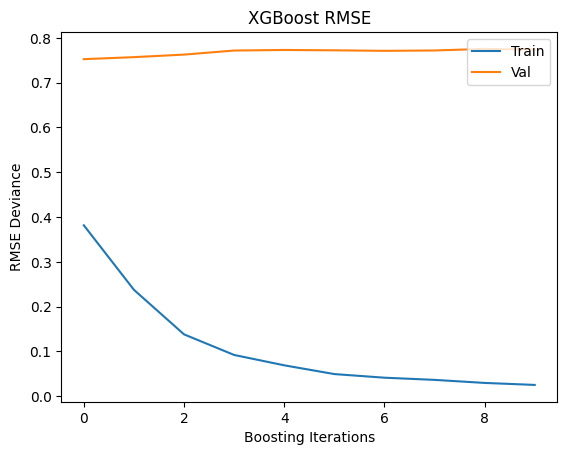

In [28]:
model = XGBRegressor(n_estimators=10, max_depth=10, learning_rate=0.8)

model.fit(features_train_xgb, target_train_xgb, eval_set= [(features_train_xgb, target_train_xgb), (features_val, target_val)])
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(f'Ошибка MAE на обучающей выборке: {mean_absolute_error(pred_train, target_train)}')
print(f'Ошибка MAE на валидационной выборке: {mean_absolute_error(pred_test, target_test)}')

epochs = len(model.evals_result()['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model.evals_result()['validation_0']['rmse'], label='Train')
ax.plot(x_axis, model.evals_result()['validation_1']['rmse'], label='Val')

plt.title('XGBoost RMSE')
plt.xlabel("Boosting Iterations")
plt.ylabel("RMSE Deviance")
plt.legend(loc="upper right");

Чтобы избежать переобучения, попробуем взять поменьше шаг, и обучать несложные модели

c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

[0]	validation_0-rmse:0.78335	validation_1-rmse:0.79031
[1]	validation_0-rmse:0.75592	validation_1-rmse:0.77437
[2]	validation_0-rmse:0.73190	validation_1-rmse:0.76088
[3]	validation_0-rmse:0.71066	validation_1-rmse:0.74879
[4]	validation_0-rmse:0.69210	validation_1-rmse:0.73992
[5]	validation_0-rmse:0.67554	validation_1-rmse:0.73212
[6]	validation_0-rmse:0.66029	validation_1-rmse:0.72746
[7]	validation_0-rmse:0.64616	validation_1-rmse:0.72082
[8]	validation_0-rmse:0.63325	validation_1-rmse:0.71547
[9]	validation_0-rmse:0.62176	validation_1-rmse:0.71350
[10]	validation_0-rmse:0.61114	validation_1-rmse:0.71034
[11]	validation_0-rmse:0.60247	validation_1-rmse:0.70897
[12]	validation_0-rmse:0.59378	validation_1-rmse:0.70937
[13]	validation_0-rmse:0.58567	validation_1-rmse:0.70832
[14]	validation_0-rmse:0.57946	validation_1-rmse:0.70839
[15]	validation_0-rmse:0.57203	validation_1-rmse:0.70947
[16]	validation_0-rmse:0.56718	validation_1-rmse:0.71007
[17]	validation_0-rmse:0.56097	validation

[27]	validation_0-rmse:0.51548	validation_1-rmse:0.70947
[28]	validation_0-rmse:0.51234	validation_1-rmse:0.71122
[29]	validation_0-rmse:0.50918	validation_1-rmse:0.71102
[30]	validation_0-rmse:0.50523	validation_1-rmse:0.71067
[31]	validation_0-rmse:0.50133	validation_1-rmse:0.71206
[32]	validation_0-rmse:0.49830	validation_1-rmse:0.71118
[33]	validation_0-rmse:0.49532	validation_1-rmse:0.71042
[34]	validation_0-rmse:0.49326	validation_1-rmse:0.71025
[35]	validation_0-rmse:0.49018	validation_1-rmse:0.71147
[36]	validation_0-rmse:0.48811	validation_1-rmse:0.71066
[37]	validation_0-rmse:0.48609	validation_1-rmse:0.70969
[38]	validation_0-rmse:0.48447	validation_1-rmse:0.70965
[39]	validation_0-rmse:0.48365	validation_1-rmse:0.70922
[40]	validation_0-rmse:0.48072	validation_1-rmse:0.71025
[41]	validation_0-rmse:0.47887	validation_1-rmse:0.71025
[42]	validation_0-rmse:0.47684	validation_1-rmse:0.71133
[43]	validation_0-rmse:0.47583	validation_1-rmse:0.71187
[44]	validation_0-rmse:0.47488	

c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

Ошибка на обучающей выборке: 0.38529635251214644
Ошибка на валидационной выборке: 0.47742013454437254


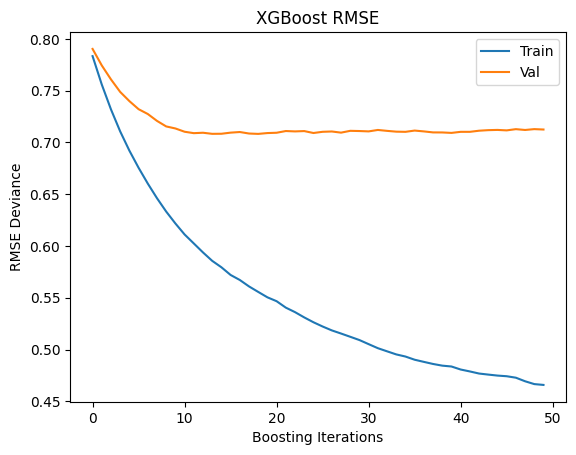

In [29]:
model = XGBRegressor(n_estimators=50, max_depth=4, learning_rate=0.09)

model.fit(features_train_xgb, target_train_xgb, eval_set= [(features_train_xgb, target_train_xgb), (features_val, target_val)])
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(f'Ошибка на обучающей выборке: {mean_absolute_error(pred_train, target_train)}')
print(f'Ошибка на валидационной выборке: {mean_absolute_error(pred_test, target_test)}')

epochs = len(model.evals_result()['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model.evals_result()['validation_0']['rmse'], label='Train')
ax.plot(x_axis, model.evals_result()['validation_1']['rmse'], label='Val')

plt.title('XGBoost RMSE')
plt.xlabel("Boosting Iterations")
plt.ylabel("RMSE Deviance")
plt.legend(loc="upper right");